 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, parse_dates=True, index_col='Date', infer_datetime_format=True)

In [3]:
# Count nulls
# YOUR CODE HERE

whale_returns.isnull().sum()

SOROS       1
PAULSON     1
TIGER GL    1
BRKB        1
dtype: int64

In [4]:
# Drop nulls
# YOUR CODE HERE
whale_returns.dropna()

,SOROS,PAULSON,TIGER GL,BRKB
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns = Path("Resources/algo_returns.csv")
# YOUR CODE HERE
algo_returns = pd.read_csv(algo_returns, parse_dates=True, index_col='Date', infer_datetime_format=True)

In [6]:
# Count nulls
# YOUR CODE HERE

algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
# YOUR CODE HERE

algo_returns.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")

# YOUR CODE HERE
sp500_history = pd.read_csv(sp500_history_csv, parse_dates=True, index_col="Date", infer_datetime_format=True)

In [9]:
# Check Data Types
# YOUR CODE HERE

sp500_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# YOUR CODE HERE

sp500_history['Close'] = sp500_history['Close'].str.replace('$', '')
sp500_history['Close'] = sp500_history['Close'].astype(float)

In [11]:
# Calculate Daily Returns
# YOUR CODE HERE
sp500_history_return = sp500_history.pct_change(1)

In [12]:
# Drop nulls
# YOUR CODE HERE

sp500_history.isnull().sum()
sp500_history.dropna()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [13]:
# Rename Column
# YOUR CODE HERE

sp500_history_return.rename(columns={'Close':'S&P500'}, inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
# YOUR CODE HERE

grouped_returns = pd.concat([whale_returns, algo_returns, sp500_history_return], axis='columns', join='inner')
grouped_returns.head()

,SOROS,PAULSON,TIGER GL,BRKB,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.004559
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

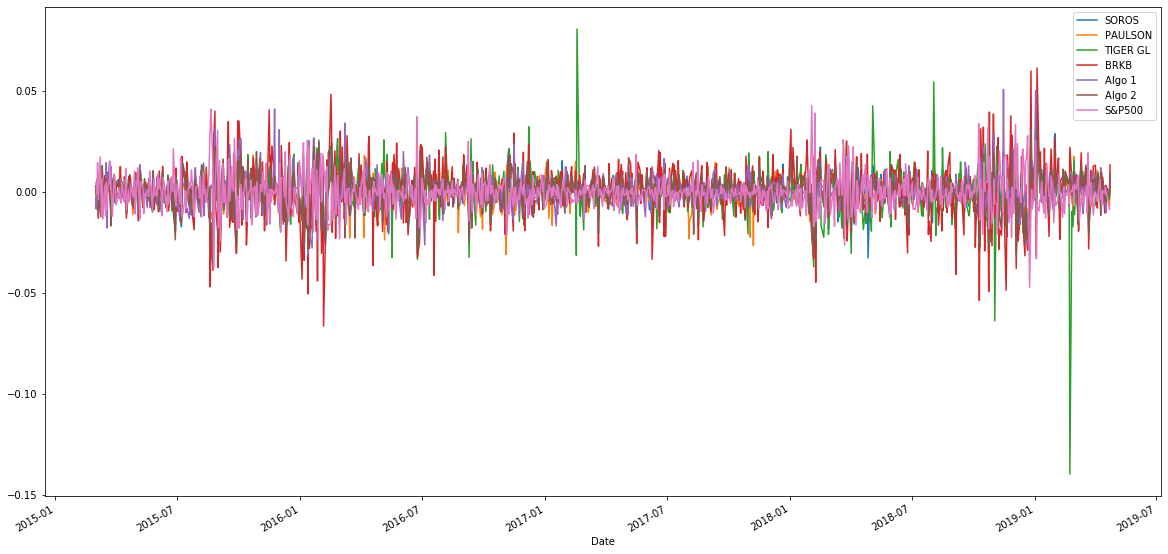

In [15]:
# Plot daily returns
# YOUR CODE HERE
grouped_returns.plot(figsize=(20,10))

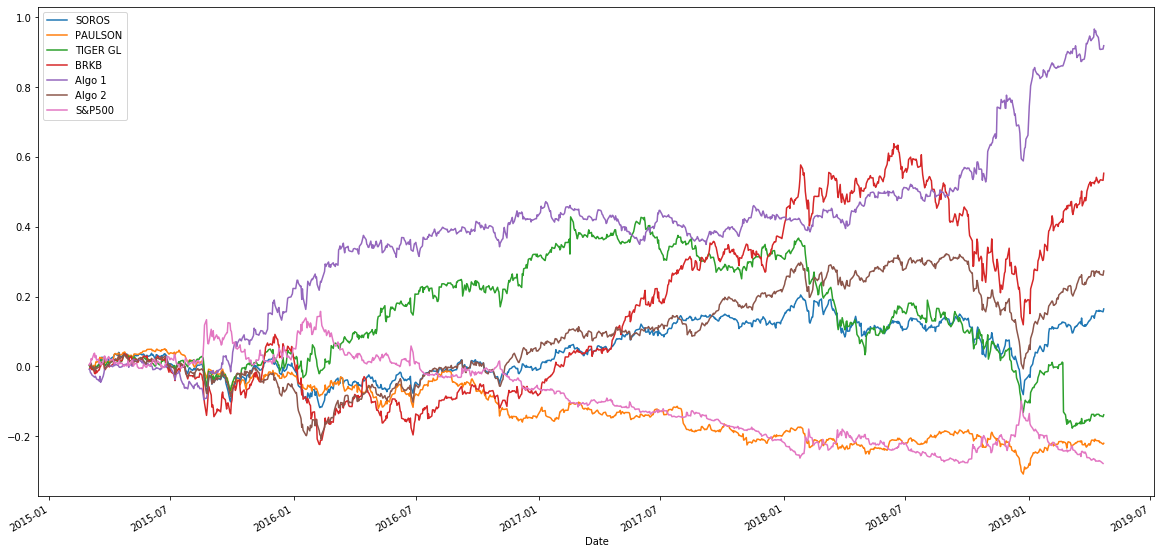

In [16]:
# Plot cumulative returns
# YOUR CODE HERE
cumulative_returns = (1 + grouped_returns).cumprod()-1
cumulative_returns.plot(figsize=(20,10))

Analysis
- Algo 1 had the highest cumulative return.
- S&P500 had the lowest cumulative return. 

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

In [17]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE

grouped_returns_std = grouped_returns.std
grouped_returns_std().sort_values(ascending=False)

BRKB        0.012919
TIGER GL    0.010894
S&P500      0.008584
Algo 2      0.008339
SOROS       0.007895
Algo 1      0.007621
PAULSON     0.007023
dtype: float64

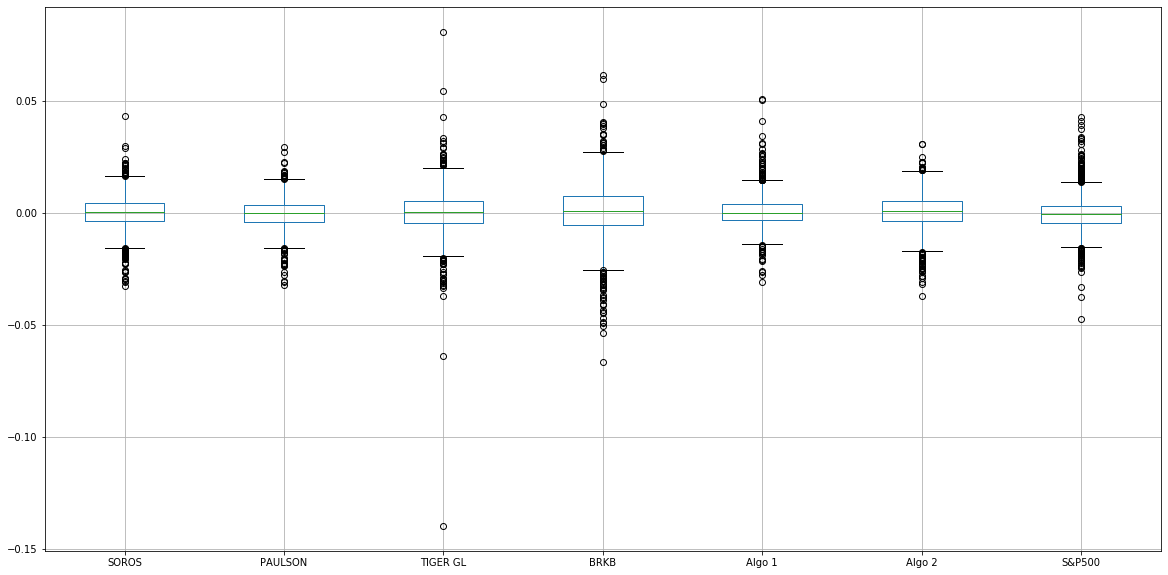

In [48]:
# Box plot to visually show risk
# YOUR CODE HERE


#grouped_returns.boxplot(column =['SOROS','PAULSON','TIGER GL','BRKB','Algo 1', 'Algo 2', "S&P500"], grid = False)
#grouped_returns_std.boxplot(figsize=(20,10))(column =['SOROS','PAULSON','TIGER GL','BRKB','Algo 1', 'Algo 2', "S&P500"])
#grouped_returns_std.boxplot()
#boxplot = grouped_returns_std.boxplot(column=['SOROS','PAULSON','TIGER GL','BRKB','Algo 1', 'Algo 2', "S&P500"], grid = False)
#grouped_returns.boxplot(column =['SOROS','PAULSON','TIGER GL','BRKB','Algo 1', 'Algo 2', "S&P500"], grid = False)
#grouped_returns_std.boxplot(column =['SOROS','PAULSON','TIGER GL','BRKB','Algo 1', 'Algo 2', "S&P500"], grid = False)

grouped_returns.boxplot(figsize=(20,10))

In [19]:
# Calculate the annualized standard deviation (252 trading days)
# YOUR CODE HERE

grouped_returns_annualized= grouped_returns.std() * np.sqrt(252)
grouped_returns_annualized.sort_values(ascending=False)

BRKB        0.205077
TIGER GL    0.172936
S&P500      0.136268
Algo 2      0.132374
SOROS       0.125335
Algo 1      0.120987
PAULSON     0.111488
dtype: float64

Analysis
- Berkshire Hathaway and Tiger Global Management are riskier than the S&P 500. 

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&P 500

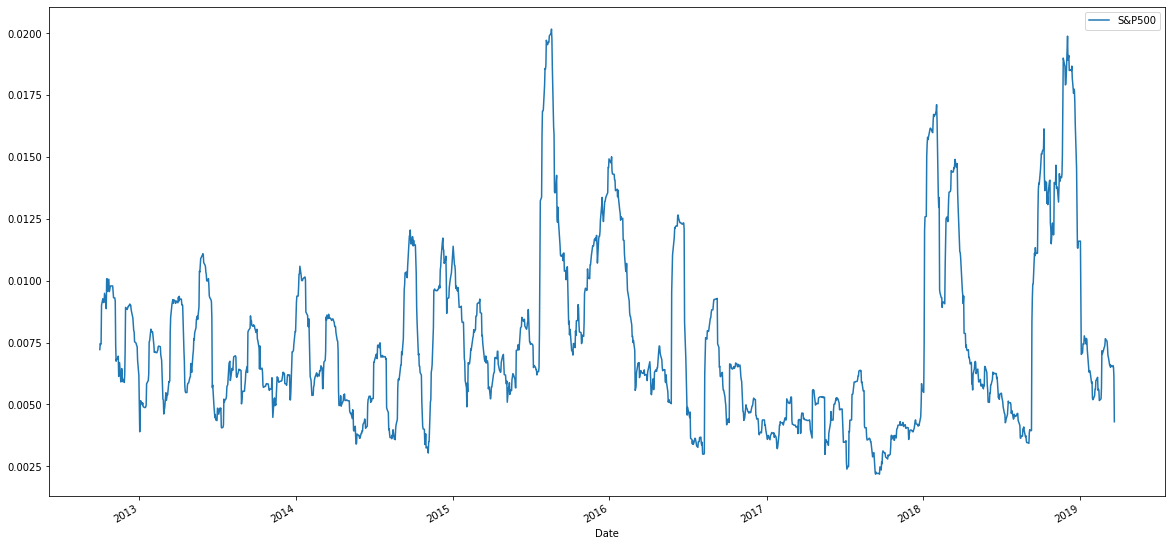

In [44]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
# YOUR CODE HERE
sp500_sma_21 = sp500_history_return.rolling(window=21).std().plot(figsize=(20,10))

In [21]:
# Correlation
# YOUR CODE HERE
correlation = grouped_returns.corr()
correlation

,SOROS,PAULSON,TIGER GL,BRKB,Algo 1,Algo 2,S&P500
SOROS,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.000574
PAULSON,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.013549
TIGER GL,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.001505
BRKB,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,-0.013856
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.287650,-0.034561
Algo 2,0.826873,0.678152,0.507414,0.688082,0.287650,1.000000,-0.002001
S&P500,0.000574,0.013549,-0.001505,-0.013856,-0.034561,-0.002001,1.000000


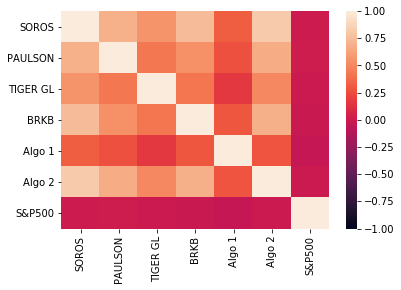

In [22]:
sns.heatmap(correlation, vmin=-1, vmax=1)

In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# YOUR CODE HERE

covariance = grouped_returns['BRKB'].cov(grouped_returns['S&P500'])
variance = grouped_returns['S&P500'].var()
brkb_beta = covariance / variance
brkb_beta

-0.02086015517134707

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [24]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [25]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

sharpe_ratios = (grouped_returns.mean() * 252) / (grouped_returns.std() * np.sqrt(252))
sharpe_ratios.sort_values(ascending=False)

Algo 1      1.360829
BRKB        0.621810
Algo 2      0.506929
SOROS       0.356417
TIGER GL   -0.121060
PAULSON    -0.483570
S&P500     -0.510171
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

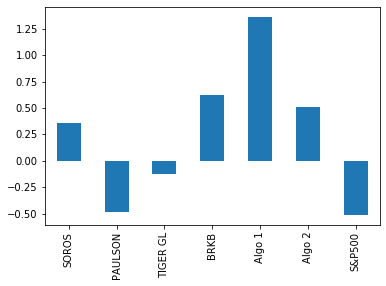

In [26]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
sharpe_ratios.plot(kind="bar")

Analysis

- Both Algo strategies outperformed the market. 
- Algo 1 had the highest sharpe ratio at 1.36.
- Berkshire Hathaway had the second highest sharpe ratio at 0.62
- Algo 2 had the third highest sharpe ratio at 0.51. 
- Algo 1 outpeformed all the whales. Algo 2 outperformed all the whales except for Berkshire Hathaway. 

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read the first stock
# YOUR CODE HERE

qcom_historical_csv = Path("Resources/qcom_historical.csv")
qcom_historical = pd.read_csv(qcom_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [28]:
# Read the second stock
# YOUR CODE HERE

ko_historical_csv = Path("Resources/ko_historical.csv")
ko_historical = pd.read_csv(ko_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [29]:
# Read the third stock
# YOUR CODE HERE

dis_historical_csv = Path("Resources/dis_historical.csv")
dis_historical = pd.read_csv(dis_historical_csv, index_col='Date', parse_dates=True, infer_datetime_format=True)

In [30]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

qcom_ko_dis = pd.concat([qcom_historical, ko_historical, dis_historical], axis='columns', join='inner')

In [31]:
#Fix the date issue since Google historical data includes time stamps 

qcom_ko_dis_fixed = qcom_ko_dis.copy()
qcom_ko_dis_fixed.index = qcom_ko_dis.index.to_series().dt.date
qcom_ko_dis_fixed_return = qcom_ko_dis_fixed.pct_change()
qcom_ko_dis_fixed_return.sample(10)

,QCOM,KO,DIS
Date,,,
2018-04-11,0.004382,0.000000,-0.005623
2013-08-28,0.008179,0.005242,0.001977
2013-03-21,-0.005932,0.005016,-0.011064
2018-01-10,-0.000153,-0.003461,-0.004275
2018-07-27,-0.013998,-0.000649,-0.007841
2012-04-10,-0.004211,-0.011800,-0.026597
2013-08-08,0.017482,0.001245,-0.002428
2010-11-01,0.003764,0.006523,-0.002768
2019-04-16,0.232074,-0.001064,-0.016207


In [32]:
# Reset the index
# YOUR CODE HERE
qcom_ko_dis_fixed.sort_index()

,QCOM,KO,DIS
Date,,,
2010-04-09,42.17,27.30,36.22
2010-04-12,42.23,27.38,35.89
2010-04-13,42.30,27.51,35.84
2010-04-14,42.60,27.48,36.20
2010-04-15,42.70,27.13,36.40
...,...,...,...
2020-04-02,68.02,43.95,96.97
2020-04-03,65.23,43.83,93.88
2020-04-06,70.95,46.67,99.58


In [33]:
# Drop Nulls
# YOUR CODE HERE
qcom_ko_dis.dropna()
qcom_ko_dis.isnull().sum()

QCOM    0
KO      0
DIS     0
dtype: int64

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

qcom_ko_dis_fixed_return_weighted = qcom_ko_dis_fixed_return.dot(weights)
qcom_ko_dis_fixed_return_weighted.head()

Date
2010-04-09         NaN
2010-04-12   -0.001586
2010-04-13    0.001671
2010-04-14    0.005349
2010-04-15   -0.001621
dtype: float64

In [35]:
qcom_ko_dis_fixed_return['My Portfolio'] = qcom_ko_dis_fixed_return_weighted
qcom_ko_dis_fixed_return

,QCOM,KO,DIS,My Portfolio
Date,,,,
2010-04-09,NaN,NaN,NaN,NaN
2010-04-12,0.001423,0.002930,-0.009111,-0.001586
2010-04-13,0.001658,0.004748,-0.001393,0.001671
2010-04-14,0.007092,-0.001091,0.010045,0.005349
2010-04-15,0.002347,-0.012737,0.005525,-0.001621
...,...,...,...,...
2020-04-02,0.032170,0.043447,0.021597,0.032405
2020-04-03,-0.041017,-0.002730,-0.031866,-0.025204
2020-04-06,0.087690,0.064796,0.060716,0.071067


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# YOUR CODE HERE
combined_portfolios = pd.concat([grouped_returns,qcom_ko_dis_fixed_return], axis='columns', join='inner')

In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE
combined_portfolios.dropna()
combined_portfolios.head()

,SOROS,PAULSON,TIGER GL,BRKB,Algo 1,Algo 2,S&P500,QCOM,KO,DIS,My Portfolio
Date,,,,,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.004559,0.002069,-0.002309,0.017390,0.005717
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,-0.017203,-0.005787,0.004344,-0.006215
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.007842,-0.010477,-0.007334,-0.008551
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.001129,-0.002353,-0.005115,-0.002113
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,0.008177,-0.020755,-0.011521,-0.008033


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [38]:
# Risk
# YOUR CODE HERE

combined_portfolios_annualized_std= combined_portfolios.std() * np.sqrt(252)
combined_portfolios_annualized_std.sort_values(ascending=False)


QCOM            0.312743
BRKB            0.205077
DIS             0.195751
TIGER GL        0.172936
My Portfolio    0.159098
KO              0.140111
S&P500          0.136268
Algo 2          0.132374
SOROS           0.125335
Algo 1          0.120987
PAULSON         0.111488
dtype: float64

Analysis

- Including the individual standard deviations for each of my three stocks (QCOM, DIS, and KO), My Portfolio has the 5th highest standard deviation. 
- Excluding the individual standard deviations for each of my three stocks (QCOM, DIS and KO), My Portfolio has the 3rd highest standard deviation. 
- The higher standard deviation for My Portfolio can likely be explained by QCOM, a semiconductor company, who has gone through many lawsuits over the years. 

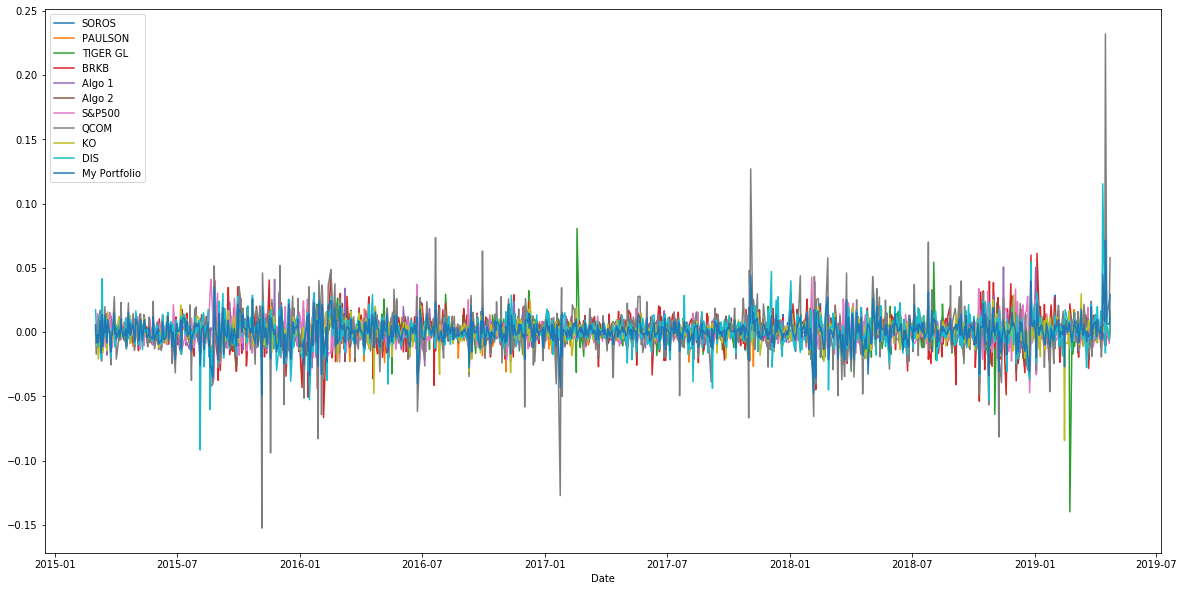

In [39]:
# Rolling
# YOUR CODE HERE

combined_portfolios_sma = combined_portfolios.rolling(window=21).std()
combined_portfolios.plot(figsize=(20,10))

In [40]:
# Beta
# YOUR CODE HERE
covariance = combined_portfolios['My Portfolio'].cov(combined_portfolios['S&P500'])
variance = combined_portfolios['S&P500'].var()
qcom_ko_dis_beta = covariance / variance
qcom_ko_dis_beta


0.016713292397766356

In [41]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

#qcom_ko_dis_fixed_return_weighted_sharpe_ratio = (qcom_ko_dis_fixed_return_weighted.mean() * 252) / (qcom_ko_dis_fixed_return_weighted.std() * np.sqrt(252))
#qcom_ko_dis_fixed_return_weighted_sharpe_ratio

combined_sharpe = (combined_portfolios.mean()* 252) / (combined_portfolios.std() * np.sqrt(252))
combined_sharpe.sort_values(ascending=False)


Algo 1          1.360829
BRKB            0.621810
Algo 2          0.506929
My Portfolio    0.432479
DIS             0.403497
SOROS           0.356417
QCOM            0.292962
KO              0.255606
TIGER GL       -0.121060
PAULSON        -0.483570
S&P500         -0.510171
dtype: float64

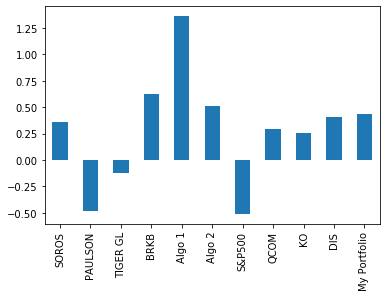

In [42]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE
combined_sharpe.plot(kind="bar")

Analysis

- My Portfolio had the 4th largest sharpe ratio. 
- Interestingly, My Portfolio, weighted equally among the 3 stocks I chose, had a higher sharpe ratio than each of the individual stocks. 

## Include correlation analysis to determine which stocks (if any) are correlated

In [99]:
# YOUR CODE HERE
combined_portfolios_correlation = combined_portfolios.corr()
combined_portfolios_correlation

,SOROS,PAULSON,TIGER GL,BRKB,Algo 1,Algo 2,S&P500,QCOM,KO,DIS,My Portfolio
SOROS,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.000574,0.412694,0.323248,0.518638,0.577893
PAULSON,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.013549,0.332936,0.219853,0.422476,0.455862
TIGER GL,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.001505,0.269106,0.445393,0.401340,0.471586
BRKB,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,-0.013856,0.367027,0.251305,0.436161,0.493045
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.287650,-0.034561,0.150246,0.068163,0.159109,0.183711
Algo 2,0.826873,0.678152,0.507414,0.688082,0.287650,1.000000,-0.002001,0.423268,0.328567,0.508687,0.582421
S&P500,0.000574,0.013549,-0.001505,-0.013856,-0.034561,-0.002001,1.000000,0.021098,-0.000282,0.001520,0.014366
QCOM,0.412694,0.332936,0.269106,0.367027,0.150246,0.423268,0.021098,1.000000,0.212193,0.301923,0.841358
KO,0.323248,0.219853,0.445393,0.251305,0.068163,0.328567,-0.000282,0.212193,1.000000,0.300595,0.555872
DIS,0.518638,0.422476,0.401340,0.436161,0.159109,0.508687,0.001520,0.301923,0.300595,1.000000,0.696199


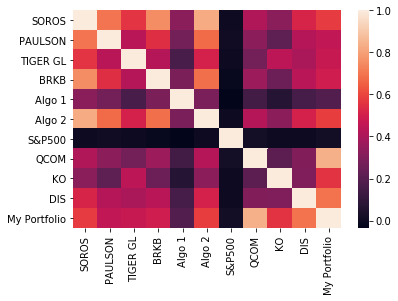

In [100]:
sns.heatmap(combined_portfolios_correlation)

Analysis

- My Portfolio had the lowest correlation with the S&P 500. This is interesting to note because three stocks I chose are all components of the S&P500.
- Algo 2 and the Soros fund have the highest correlation at ~0.83. Perhaps these two funds employ similar investing strategies. 